In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

In [36]:
def func(x, k , m):
    return ((k - 1) / ((k/x) - x)) ** (m)



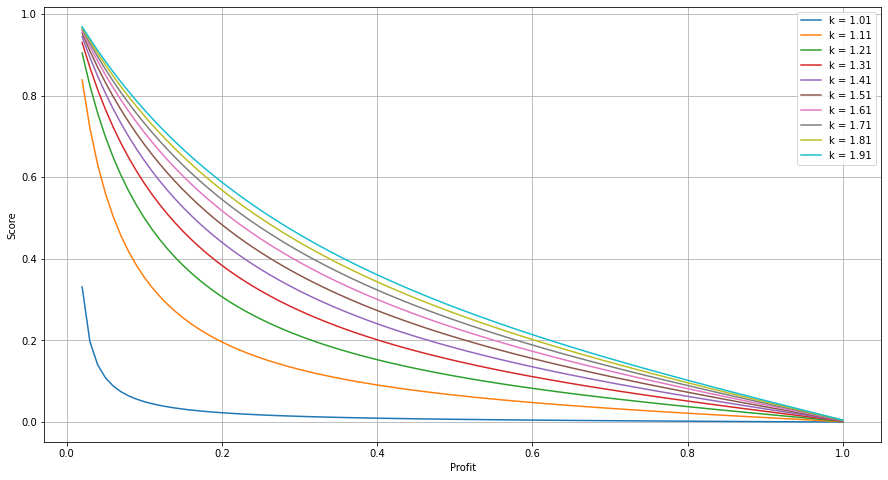

In [59]:
plt.figure(figsize=(15, 8))
for k in np.arange(1.01, 2, 0.1):
    plt.plot(
        np.arange(1, 0.01, -0.01),

        [func(x, k, 1) for x in np.arange(0.01, 1, 0.01)], label=f"k = {k:.2f}"
    )

plt.legend()
plt.grid()
plt.ylabel("Score")
plt.xlabel("Profit")
plt.show()


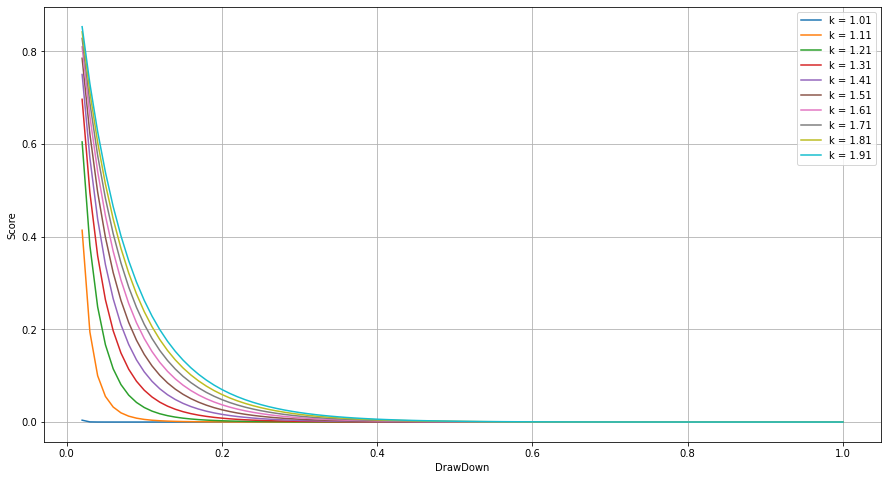

In [49]:
plt.figure(figsize=(15,8))
for k in np.arange(1.01,2,0.1):
    plt.plot(
        np.arange(1,0.01,-0.01),
        [func(x , k, 5) for x in np.arange(0.01,1,0.01)],label = f"k = {k:.2f}"
    )

plt.legend()
plt.grid()
plt.ylabel("Score")
plt.xlabel("DrawDown")
plt.show()

In [197]:
def s(a, b, c, m, mode):
    if mode == 1:
        if c >= a:
            return np.exp(m*(((c/a-1) / (c/b - b/a )) - 1))  #* (c/a - 1)
        else:
            
            return np.exp(m * (1 - (c/a - 1) / (b/a - c/b))) #* (c/a - 1)

    elif mode == -1:
        if c <= a:

            return  np.exp(m*(((1 - c/a) / (-c/b + b/a )) - 1)) #* (1 - c/a)

        else:
            
            return np.exp(m * (1 - (1 - c/a) / (- b/a + c/b))) #* (1 - c/a)


In [1]:
dataz = {}
Bs = np.arange(1, 0.1, -0.05)
Cs = np.arange(0.1, 1, 0.05)
for B in Bs:
    dataz[B] = []
    for C in Cs:
        dataz[B].append(s(1, B, C, 1 , 1 ))
        

NameError: name 'np' is not defined

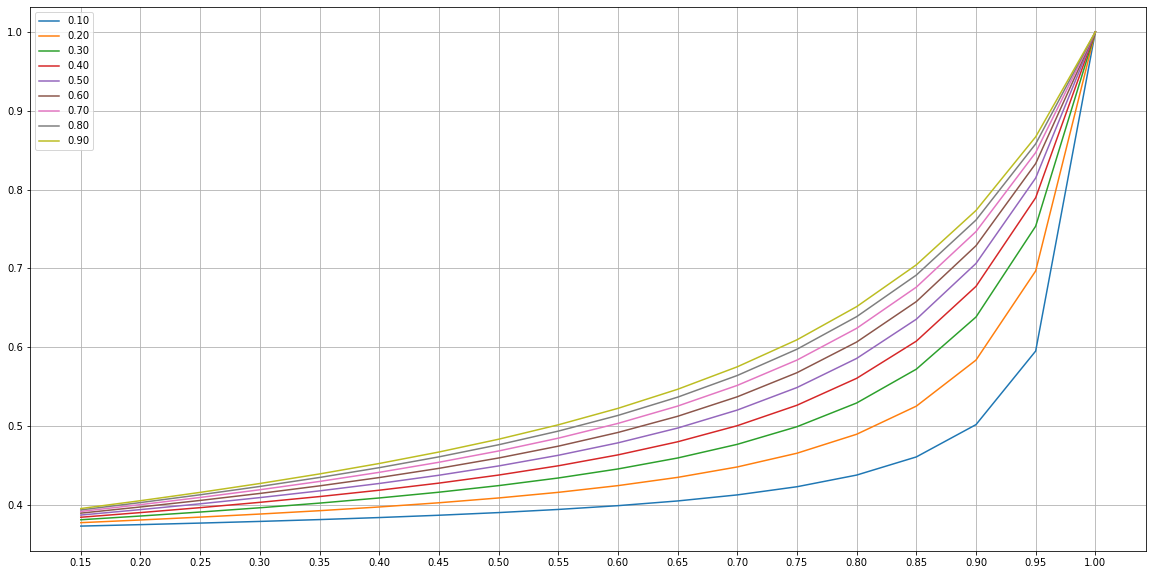

In [205]:
plt.figure(figsize=(20,10))
Bs = np.arange(1, 0.1, -0.05)
Cs = np.arange(0.1, 1, 0.1)
plt.xticks(Bs)
for C in Cs:
    tmp = []
    X = []
    for B in Bs:
        if B<=C or True:
            X.append(B)
            tmp.append(s(1, B, C+1 , 1 , 1))
    plt.plot(X, tmp , label = f"{C:.2f}")
plt.legend()
plt.grid()

In [194]:
Bs

array([1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.55, 0.5 ,
       0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15])

In [159]:
pdataz =  pd.DataFrame(dataz)

# Read data from a csv
z_data = pdataz

fig = go.Figure(data=[go.Surface(x= Bs , y =Cs , z=z_data.values)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

fig.show()


In [160]:
pdataz

,1.00,0.95,0.90,0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.30,0.25,0.20,0.15
0,-6.650150,-7.053070,-7.535608,-8.122512,-8.849436,-9.769398,-10.964245,-12.566105,-14.800182,-18.076983,-23.211306,-32.010631,-49.138335,-8.953588e+01,-2.202227e+02,-9.869698e+02,-1.982382e+04,-1.606341e+08
1,-6.280698,-6.685768,-7.176519,-7.781637,-8.543522,-9.527170,-10.836669,-12.647772,-15.277329,-19.345911,-26.207680,-39.283886,-69.233238,-1.619813e+02,-6.679062e+02,-1.135577e+04,-5.581097e+07,-0.000000e+00
2,-5.911245,-6.318761,-6.819005,-7.445618,-8.249807,-9.312913,-10.770990,-12.866593,-16.068430,-21.382455,-31.297027,-53.349065,-118.730527,-4.504242e+02,-6.482467e+03,-1.932396e+07,-0.000000e+00,-2.447219e-07
3,-5.541792,-5.952114,-6.463455,-7.115802,-7.972151,-9.136870,-10.793937,-13.294068,-17.377479,-24.836589,-40.948613,-86.688213,-302.571595,-3.686077e+03,-6.664583e+06,-0.000000e+00,-6.236465e-07,-1.127579e-03
4,-5.172339,-5.585914,-6.110397,-6.794085,-7.716223,-9.014917,-10.949842,-14.059876,-19.622137,-31.290829,-63.011992,-202.348553,-2086.670591,-2.288312e+06,-0.000000e+00,-1.582231e-06,-1.735127e-03,-1.789307e-02
5,-4.802886,-5.220277,-5.760563,-6.483219,-7.490695,-8.972973,-11.317610,-15.423368,-23.788852,-45.568518,-134.632712,-1175.227569,-781692.784707,-0.000000e+00,-3.993738e-06,-2.656401e-03,-2.318810e-02,-6.850950e-02
6,-4.433434,-4.855361,-5.415008,-6.187355,-7.309496,-9.056295,-12.051322,-17.978460,-32.758890,-89.047895,-657.979895,-265448.035205,-0.000000,-1.002102e-05,-4.042768e-03,-2.987224e-02,-8.120117e-02,-1.479582e-01
7,-4.063981,-4.491393,-5.075298,-5.913057,-7.196477,-9.351122,-13.492892,-23.386595,-58.488471,-365.827898,-89515.135280,-0.000000,-0.000025,-6.109948e-03,-3.821590e-02,-9.557567e-02,-1.656568e-01,-2.390290e-01
8,-3.694528,-4.128706,-4.743868,-5.671333,-7.195958,-10.042768,-16.557726,-38.098928,-201.714397,-29937.070858,-0.000000,-0.000062,-0.009158,-4.848598e-02,-1.115651e-01,-1.839397e-01,-2.567086e-01,-3.257195e-01
9,-3.325075,-3.767804,-4.424718,-5.482122,-7.400091,-11.605653,-24.569168,-110.111370,-9911.909608,-0.000000,-0.000151,-0.013589,-0.060901,-1.289272e-01,-2.021980e-01,-2.729388e-01,-3.381648e-01,-3.971236e-01


In [138]:
s(60000 , 65000 , 45000 , 1 , -1)

0.18750000000000006

In [211]:
print(pdataz.info())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   1.0                  18 non-null     float64
 1   0.95                 18 non-null     float64
 2   0.8999999999999999   18 non-null     float64
 3   0.8499999999999999   18 non-null     float64
 4   0.7999999999999998   18 non-null     float64
 5   0.7499999999999998   18 non-null     float64
 6   0.6999999999999997   18 non-null     float64
 7   0.6499999999999997   18 non-null     float64
 8   0.5999999999999996   18 non-null     float64
 9   0.5499999999999996   18 non-null     float64
 10  0.49999999999999956  18 non-null     float64
 11  0.4499999999999995   18 non-null     float64
 12  0.39999999999999947  18 non-null     float64
 13  0.3499999999999994   18 non-null     float64
 14  0.2999999999999994   18 non-null     float64
 15  0.24999999999999933  18 non-null     float